In [44]:
import pandas as pd
import numpy as np

In [2]:
covid19_metadata = pd.read_csv("~/Downloads/SBU-US/ML/CSE512_Spring21_HW1/covid19_metadata.csv")

In [3]:
covid19_metadata

,age,gender,survival
0,65,M,Y
1,65,M,Y
2,65,M,Y
3,65,M,Y
4,74,M,N
...,...,...,...
223,40,F,Y
224,70,F,Y
225,47,M,Y
226,25,M,Y


In [4]:
covid19_time_series = pd.read_csv("~/Downloads/SBU-US/ML/CSE512_Spring21_HW1/covid19_time_series.csv")

In [5]:
covid19_time_series

,cases,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20
0,confirmed,1,1,2,2,5,5,5,5,5,...,5529824,5573847,5622470,5667070,5701645,5739536,5777710,5821819,5867785,5913941
1,deaths,0,0,0,0,0,0,0,0,0,...,173177,174255,175367,176350,176800,177245,178486,179708,180824,181800


In [137]:
covid19_metadata_e = covid19_metadata

In [138]:
covid19_metadata_e['gender'] = covid19_metadata_e['gender'].replace({"M":0, "F":1})

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [139]:
covid19_metadata_e

,age,gender,survival
0,65,0,Y
1,65,0,Y
2,65,0,Y
3,65,0,Y
4,74,0,N
...,...,...,...
223,40,1,Y
224,70,1,Y
225,47,0,Y
226,25,0,Y


In [18]:
test = pd.get_dummies(covid19_metadata['gender'])

In [9]:
test

,F,M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
223,1,0
224,1,0
225,0,1
226,0,1


In [10]:
covid19_metadata2 = pd.concat((covid19_metadata, test), axis=1)

In [11]:
covid19_metadata2

,age,gender,survival,F,M
0,65,M,Y,0,1
1,65,M,Y,0,1
2,65,M,Y,0,1
3,65,M,Y,0,1
4,74,M,N,0,1
...,...,...,...,...,...
223,40,F,Y,1,0
224,70,F,Y,1,0
225,47,M,Y,0,1
226,25,M,Y,0,1


In [13]:
covid19_metadata3 = covid19_metadata2.drop(['gender','M'],axis=1)

In [14]:
covid19_metadata3

,age,survival,F
0,65,Y,0
1,65,Y,0
2,65,Y,0
3,65,Y,0
4,74,N,0
...,...,...,...
223,40,Y,1
224,70,Y,1
225,47,Y,0
226,25,Y,0


In [15]:
covid19_metadata4 = covid19_metadata3.rename(columns={"F":"gender"})

In [16]:
covid19_metadata4

,age,survival,gender
0,65,Y,0
1,65,Y,0
2,65,Y,0
3,65,Y,0
4,74,N,0
...,...,...,...
223,40,Y,1
224,70,Y,1
225,47,Y,0
226,25,Y,0


In [20]:
test2 = pd.get_dummies(covid19_metadata4['survival'])

In [21]:
test2

,N,Y
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
223,0,1
224,0,1
225,0,1
226,0,1


In [23]:
covid19_metadata5 = pd.concat((covid19_metadata4, test2), axis=1)

In [25]:
covid19_metadata5 = covid19_metadata5.drop(['survival','N'],axis=1)

In [26]:
covid19_metadata5 = covid19_metadata5.rename(columns={"Y":"survival"})

In [27]:
covid19_metadata5

,age,gender,survival
0,65,0,1
1,65,0,1
2,65,0,1
3,65,0,1
4,74,0,0
...,...,...,...
223,40,1,1
224,70,1,1
225,47,0,1
226,25,0,1


In [29]:
first_two_columns = covid19_metadata5[['age','gender']]

In [30]:
first_two_columns

,age,gender
0,65,0
1,65,0
2,65,0
3,65,0
4,74,0
...,...,...
223,40,1
224,70,1
225,47,0
226,25,0


In [31]:
last_column = covid19_metadata5[['survival']]

In [32]:
last_column

,survival
0,1
1,1
2,1
3,1
4,0
...,...
223,1
224,1
225,1
226,1


In [36]:
X = first_two_columns.to_numpy()

In [37]:
X

array([[65,  0],
       [65,  0],
       [65,  0],
       [65,  0],
       [74,  0],
       [74,  0],
       [74,  0],
       [29,  1],
       [29,  1],
       [73,  1],
       [73,  1],
       [73,  1],
       [56,  0],
       [42,  0],
       [35,  0],
       [35,  0],
       [35,  0],
       [35,  0],
       [35,  0],
       [35,  0],
       [35,  0],
       [59,  1],
       [54,  0],
       [54,  0],
       [54,  0],
       [54,  0],
       [54,  0],
       [55,  1],
       [55,  1],
       [55,  1],
       [55,  1],
       [55,  1],
       [55,  1],
       [55,  1],
       [55,  1],
       [61,  1],
       [61,  1],
       [46,  1],
       [78,  1],
       [47,  0],
       [47,  0],
       [47,  0],
       [47,  0],
       [67,  1],
       [67,  1],
       [36,  0],
       [36,  0],
       [36,  0],
       [46,  1],
       [46,  1],
       [25,  1],
       [25,  1],
       [61,  0],
       [61,  0],
       [61,  0],
       [40,  1],
       [84,  0],
       [40,  1],
       [40,  1

In [38]:
y = last_column.to_numpy()

In [39]:
y

array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
    

In [57]:
age_survived
age_notsurvived
p=0,l=0;
for index,i in np.ndenumerate(y):
    if (i==1):
#         print (index, i)
        age_survived[p] = X[index];
        p=p+1;
#         gender_survived = X[index]
#         print (age_survived)
#         print (gender_survived)
    else:
        age_notsurvived[l] = X[index];
        l=l+1;
print(age_notsurvived)

SyntaxError: can't assign to literal (<ipython-input-57-ccba628b45ea>, line 3)

In [74]:
yy = y.tolist()

In [75]:
yy

[[1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [0],
 [1],
 [1],
 [0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [1]

In [62]:
np.where(y==1)

(array([  0,   1,   2,   3,   7,   8,  12,  13,  14,  15,  16,  17,  18,
         19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,
         32,  33,  34,  35,  36,  37,  39,  40,  41,  42,  43,  44,  48,
         49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
         62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  77,
         81,  82,  83,  89,  90,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 147,
        148, 149, 150, 151, 152, 153, 155, 156, 157, 158, 159, 160, 161,
        162, 163, 166, 167, 171, 172, 175, 176, 177, 178, 179, 180, 181,
        182, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 200,
        201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 214, 217, 218,
        219, 220, 221, 222, 223, 224, 225, 226, 227

In [92]:
survived = X[np.where(y==1)[0],:]

In [94]:
print(survived)

[[65  0]
 [65  0]
 [65  0]
 [65  0]
 [29  1]
 [29  1]
 [56  0]
 [42  0]
 [35  0]
 [35  0]
 [35  0]
 [35  0]
 [35  0]
 [35  0]
 [35  0]
 [59  1]
 [54  0]
 [54  0]
 [54  0]
 [54  0]
 [54  0]
 [55  1]
 [55  1]
 [55  1]
 [55  1]
 [55  1]
 [55  1]
 [55  1]
 [55  1]
 [61  1]
 [61  1]
 [46  1]
 [47  0]
 [47  0]
 [47  0]
 [47  0]
 [67  1]
 [67  1]
 [46  1]
 [46  1]
 [25  1]
 [25  1]
 [61  0]
 [61  0]
 [61  0]
 [40  1]
 [84  0]
 [40  1]
 [40  1]
 [40  1]
 [50  0]
 [50  0]
 [80  1]
 [80  1]
 [80  1]
 [80  1]
 [60  0]
 [60  0]
 [60  0]
 [60  0]
 [31  1]
 [70  1]
 [70  1]
 [70  1]
 [71  1]
 [23  1]
 [23  1]
 [23  1]
 [29  1]
 [29  1]
 [55  0]
 [55  0]
 [55  0]
 [55  0]
 [55  0]
 [55  0]
 [55  0]
 [48  0]
 [48  0]
 [48  0]
 [27  0]
 [27  0]
 [27  0]
 [39  1]
 [39  1]
 [55  1]
 [55  1]
 [34  0]
 [34  0]
 [33  0]
 [33  0]
 [33  0]
 [33  0]
 [33  0]
 [51  0]
 [51  0]
 [51  0]
 [51  0]
 [71  1]
 [71  1]
 [46  0]
 [46  0]
 [46  0]
 [46  0]
 [46  0]
 [46  0]
 [46  0]
 [46  0]
 [76  0]
 [76  0]
 [76  0]
 

In [96]:
np.mean(survived, axis =0)

array([50.51685393,  0.47191011])

In [97]:
np.var(survived, axis =0)

array([232.66544628,   0.24921096])

In [98]:
not_survived = X[np.where(y==0)[0],:]

In [100]:
np.mean(not_survived, axis =0)

array([63.38,  0.4 ])

In [101]:
np.var(not_survived, axis =0)

array([2.935956e+02, 2.400000e-01])

In [109]:
X[np.where(y==1)].tolist()

[65,
 65,
 65,
 65,
 29,
 29,
 56,
 42,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 59,
 54,
 54,
 54,
 54,
 54,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 61,
 61,
 46,
 47,
 47,
 47,
 47,
 67,
 67,
 46,
 46,
 25,
 25,
 61,
 61,
 61,
 40,
 84,
 40,
 40,
 40,
 50,
 50,
 80,
 80,
 80,
 80,
 60,
 60,
 60,
 60,
 31,
 70,
 70,
 70,
 71,
 23,
 23,
 23,
 29,
 29,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 48,
 48,
 48,
 27,
 27,
 27,
 39,
 39,
 55,
 55,
 34,
 34,
 33,
 33,
 33,
 33,
 33,
 51,
 51,
 51,
 51,
 71,
 71,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 76,
 76,
 76,
 52,
 52,
 52,
 52,
 52,
 63,
 63,
 61,
 61,
 61,
 54,
 62,
 59,
 78,
 78,
 78,
 54,
 54,
 54,
 74,
 73,
 78,
 78,
 34,
 39,
 56,
 56,
 56,
 50,
 49,
 64,
 64,
 64,
 78,
 78,
 39,
 39,
 39,
 39,
 75,
 57,
 30,
 30,
 30,
 25,
 25,
 40,
 40,
 60,
 60,
 47,
 47,
 50,
 50,
 50,
 35,
 18,
 18,
 30,
 40,
 40,
 40,
 40,
 70,
 47,
 25,
 25]

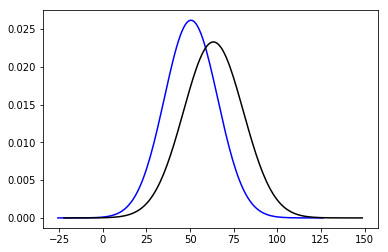

In [126]:
import scipy.stats
import matplotlib.pyplot as plt
sd = np.sqrt(232.66544628);
x_values = np.arange(50.51685393-5*sd, 50.51685393+5*sd);
y_values = scipy.stats.norm(50.51685393, sd)

# sd1 = np.sqrt(2.935956e+02)
# x_values1 = np.arange(0.47191011-5*sd1, 0.47191011+5*sd1);
# y_values1 = scipy.stats.norm(0.47191011, sd1)

sd1 = np.sqrt(2.935956e+02)
x_values1 = np.arange(63.38-5*sd1, 63.38+5*sd1);
y_values1 = scipy.stats.norm(63.38, sd1)

#plt.figure(1)
plt.plot(x_values, y_values.pdf(x_values), color='blue')
#plt.figure(2)
plt.plot(x_values1, y_values1.pdf(x_values1), color='black')
plt.show()

In [127]:
covid19_time_series

,cases,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20
0,confirmed,1,1,2,2,5,5,5,5,5,...,5529824,5573847,5622470,5667070,5701645,5739536,5777710,5821819,5867785,5913941
1,deaths,0,0,0,0,0,0,0,0,0,...,173177,174255,175367,176350,176800,177245,178486,179708,180824,181800
